# Лаба 5

# Метод сеток решения волнового уравнения

## Необходимые импорты

In [1]:
import numpy as np
import matplotlib.pyplot as plot

## Задача 1

Рассчитать колебания $u(x,t)$ 

Продольные колебания $u(x,t)$ тяги описываются уравнением:

$$ 
\begin{cases}
    \dfrac {\partial^2 u}{\partial t^2} - \dfrac {E}{\rho} \cdot \dfrac {\partial^2 u}{\partial x^2} = 0, 0 < x < L, \\
    u(0, t) = u(0, L) = 0, 0 \le t \le T
\end{cases}
$$

Где $E$ - модуль упругости; $\rho$ - плотность материала стержня;

Для решения задачи строится схема имеющая порядок аппроксимации $O(h^2 + \tau^2)$

In [2]:
def ro(x):
    if x >= L/2:
        x = L - x         
    return dt_u * x / (0.5 * L)

In [3]:
L = 6
dt_u = 0.15
E = 8.2 * 10**14
rho = 9.7 * 10**9

In [4]:
h = 0.1
tau = h / np.sqrt(E / rho)
Nx = int(L / h) + 1
Nt = int(0.1 / tau) + 1
print(f"h = {h}", f"\u03C4 = {tau}")
print(f"Nx = {Nx}", f"Nt = {Nt}")

h = 0.1 τ = 0.0003439370333750486
Nx = 61 Nt = 291


In [5]:
matrix = np.zeros((Nt, Nx))
matrix[0] = [ro(x) for x in np.linspace(0, L, Nx)]
matrix[1] = [
    ro(x) + (0.5 * tau**2) * (ro(x - h) - 2 * ro(x) + ro(x + h)) / h**2 for x in np.linspace(0, L, Nx)
]
matrix[..., 0] = matrix[..., -1] = 0
C = E * tau**2 / (rho * h**2)
for j in range(1, Nt - 1):
    for i in range(1, Nx - 1):
        matrix[j + 1, i] = \
            C * matrix[j, i - 1] + 2 * (1 - C) * matrix[j, i] + C * matrix[j, i + 1] - matrix[j - 1, i]

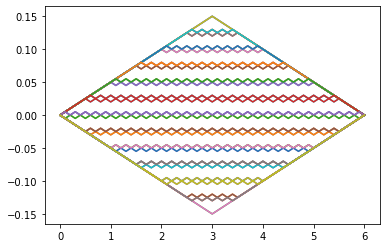

In [6]:
for i in range(0, Nt, 5):
    plot.plot(np.linspace(0, L, Nx), matrix[i])

## Задача 2

Рассчитать колебания тонкой пластины.

Колебания тонкой пластины без учета потерь на трение описываются нормированным волновым уравнением вида:

$$\dfrac {\partial^2 u}{\partial t^2} - (\dfrac {\partial^2 u}{\partial x^2} + \dfrac {\partial^2 u}{\partial y^2}) = 0, 0 < x < a, 0 < y < b $$

Схема имеет порядок сходимости $O(h_x^2 + h_y + \tau)$

In [7]:
a = 2
b = 2

In [8]:
def ro(x):
    return 2 * np.cos(np.pi * x / a)

def q(x, y):
    return np.tan(np.sin(2 * np.pi * x / a)) * np.sin(np.pi * y / b)

In [9]:
h_x = 0.05
h_y = 0.05
tau = h_x * h_y / (np.sqrt(h_x**2 + h_y**2)) / 5
Nx = int(a / h_x) + 1
Ny = int(b / h_y) + 1
Nt = int(1.6 / tau) + 1
print(f"h_x = {h_x}", f"h_y = {h_y}", f"\u03C4 = {tau}")
print(f"Nx = {Nx}", f"Ny = {Ny}", f"Nt = {Nt}")

h_x = 0.05 h_y = 0.05 τ = 0.007071067811865475
Nx = 41 Ny = 41 Nt = 227


In [10]:
matrix = np.zeros((Nt, Ny, Nx))
matrix[0] = [ro(x) for x in np.linspace(-a/2, a/2, Nx)]

for j in range(1, Ny - 1):
    for i in range(1, Nx - 1):
        matrix[1, j, i] = matrix[0, j, i] + tau * q(i * h_x, j * h_y) + (0.5 * tau**2) * \
        ((matrix[0, j, i - 1] +  matrix[0, j, i + 1]) / h_x**2 + (matrix[0, j - 1, i] + \
            matrix[0, j + 1, i]) / h_y**2 - 2 * (1 / h_x**2 + 1 / h_y**2) * matrix[0, j, i])

matrix[:2, 0] = matrix[:2, 1]
matrix[:2, -1] = matrix[:2, -2]

for k in range(1, Nt - 1):
    for j in range(1, Ny - 1):
        for i in range(1, Nx - 1):
            matrix[k + 1, j, i] = (tau**2 / h_x**2) * (matrix[k, j, i - 1] + matrix[k, j, i + 1]) + \
                (tau**2 / h_y**2) * (matrix[k, j - 1, i] + matrix[k, j + 1, i]) + \
                    2 * (1 - (tau**2/h_x**2) - (tau**2/h_y**2)) * matrix[k, j, i] - matrix[k - 1, j, i]
    matrix[k + 1, 0] = matrix[k + 1, 1]
    matrix[k + 1, -1] = matrix[k + 1, -2]

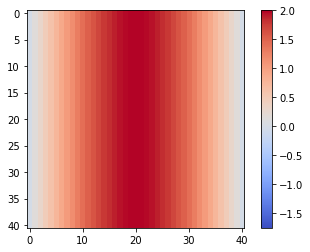

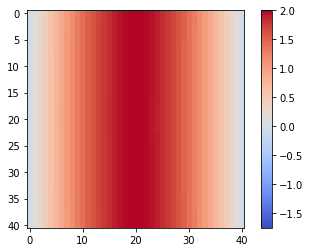

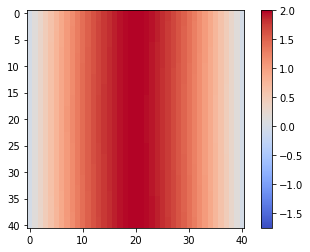

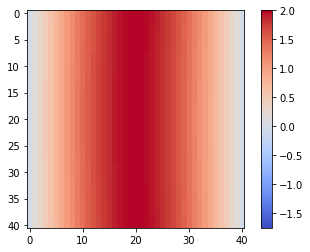

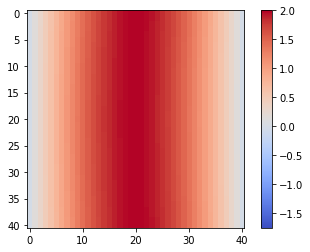

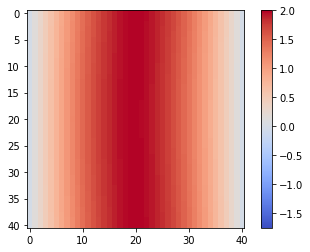

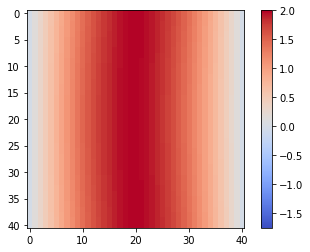

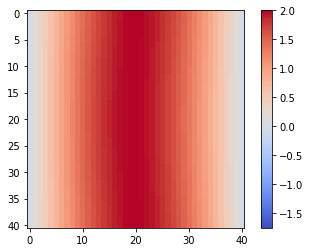

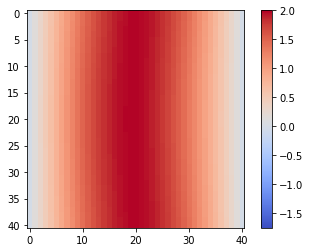

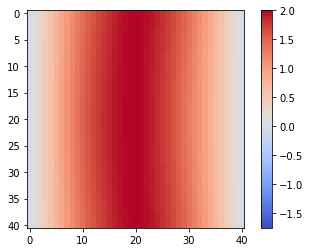

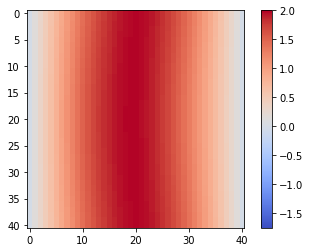

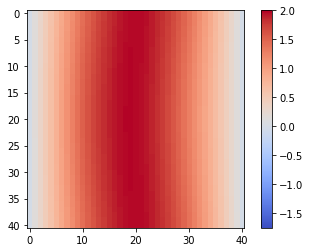

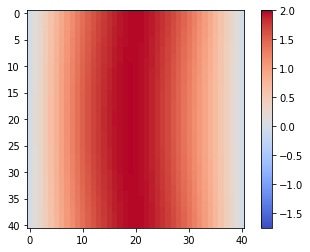

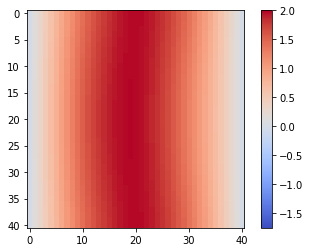

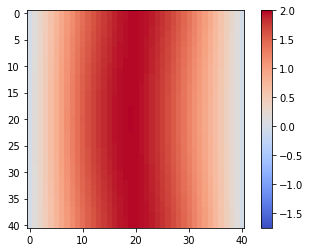

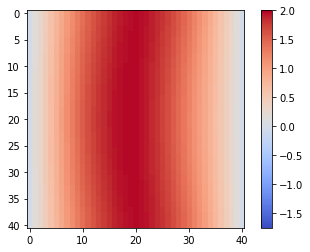

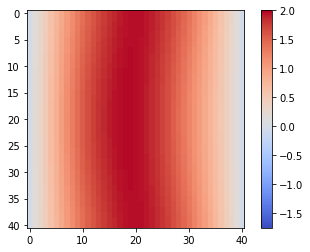

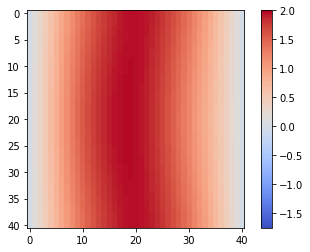

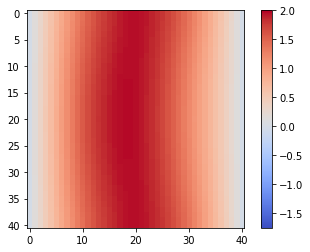

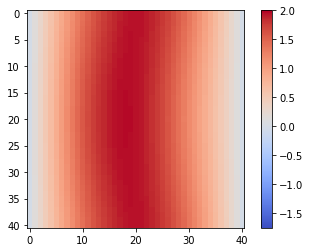

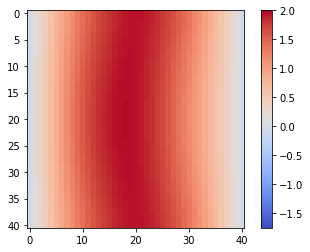

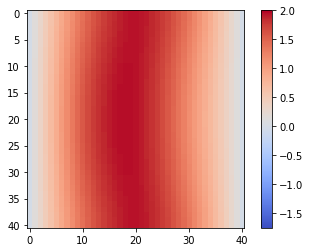

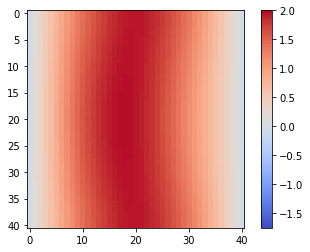

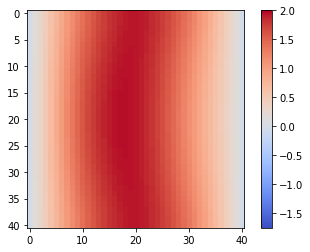

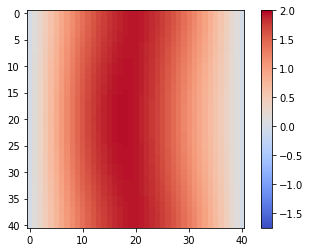

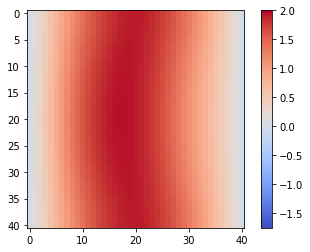

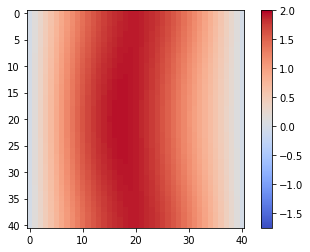

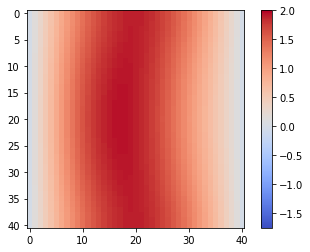

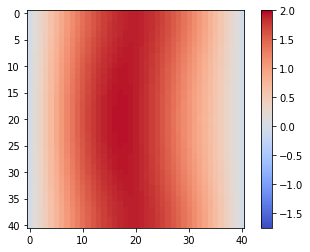

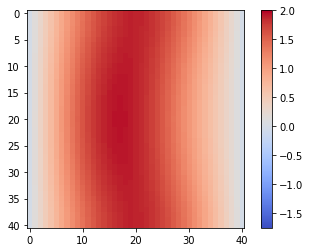

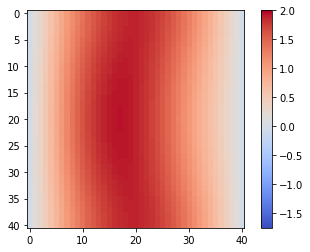

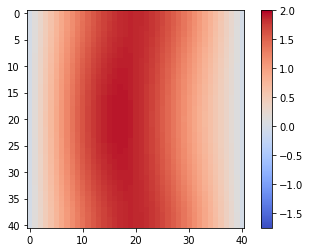

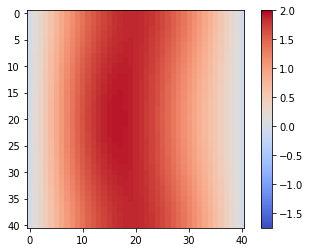

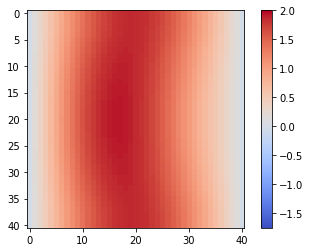

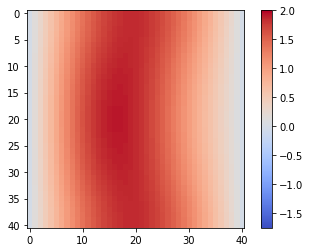

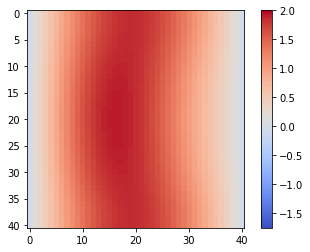

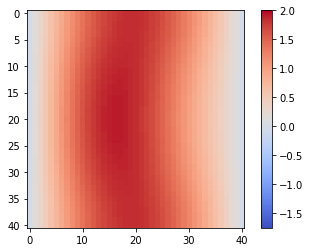

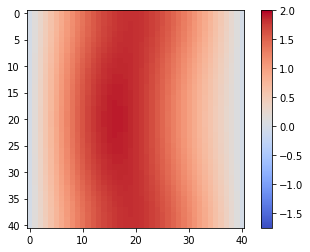

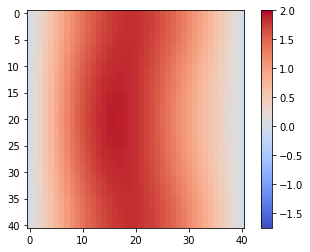

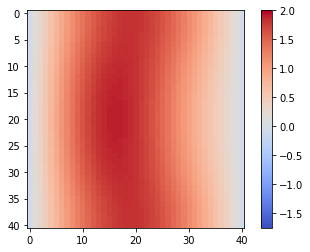

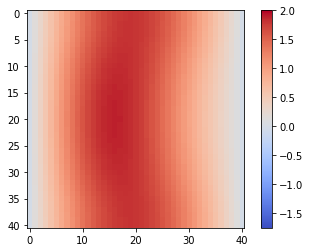

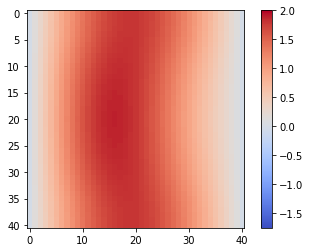

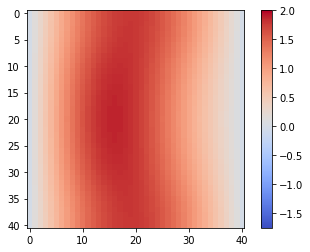

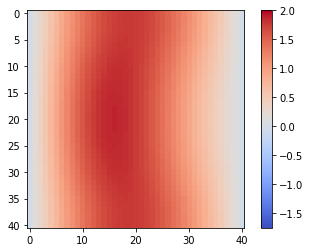

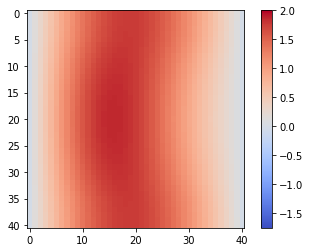

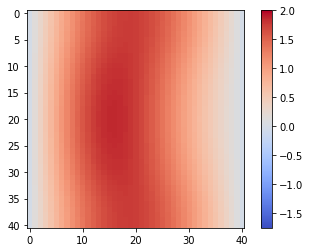

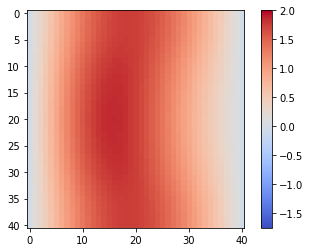

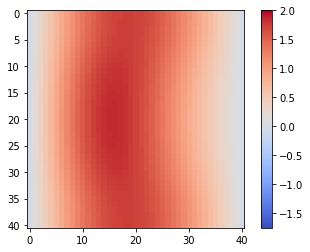

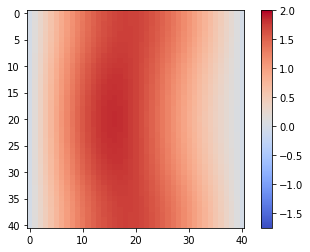

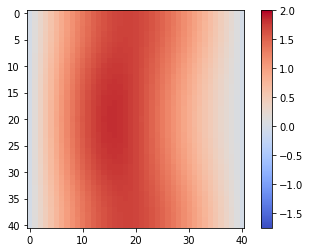

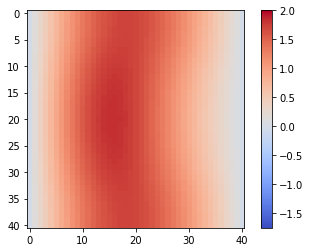

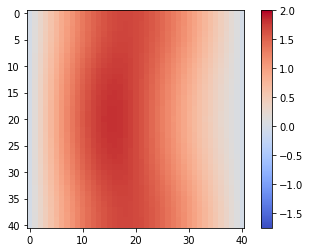

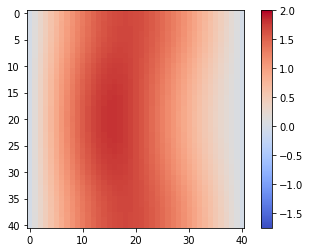

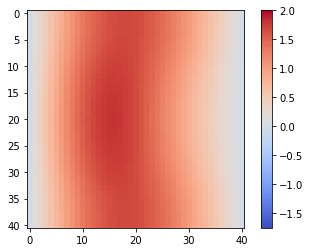

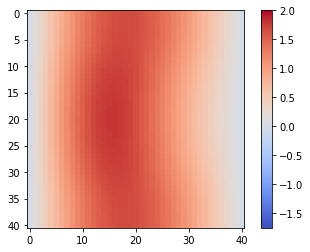

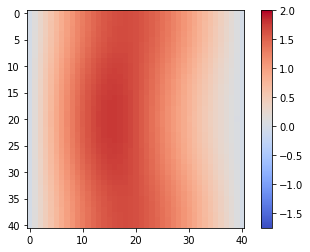

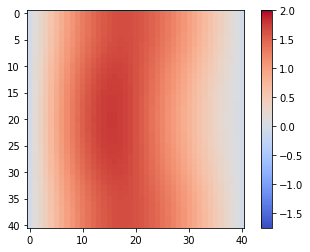

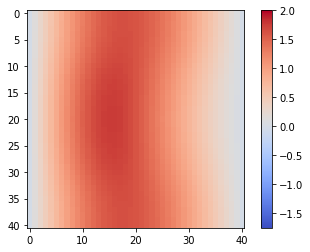

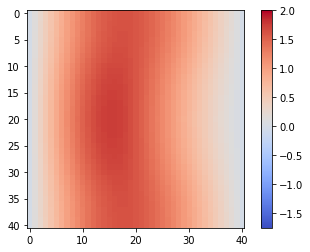

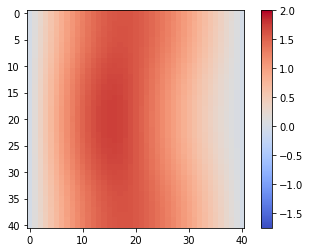

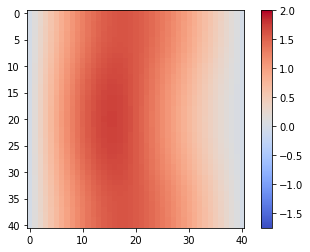

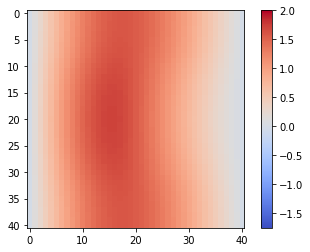

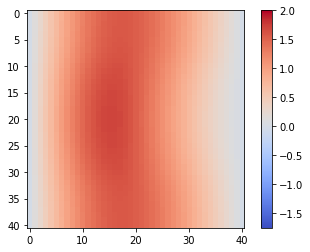

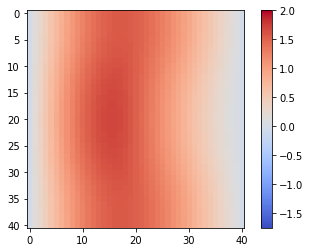

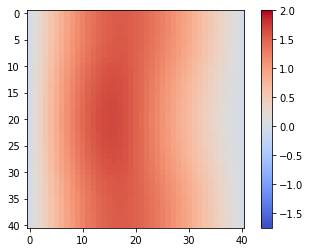

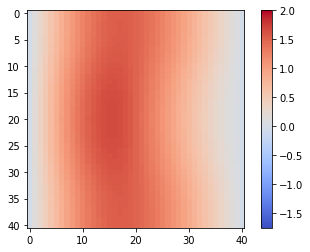

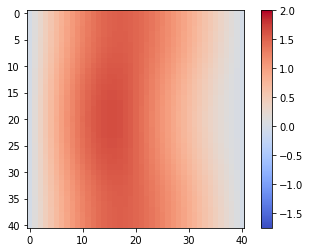

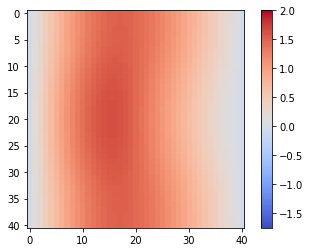

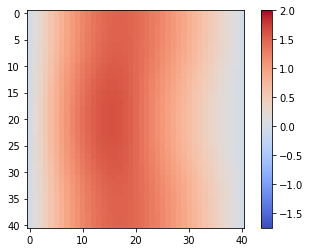

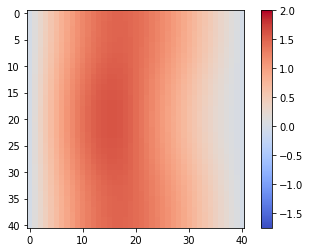

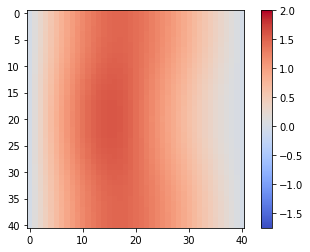

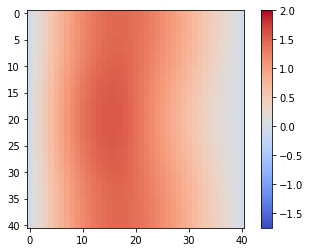

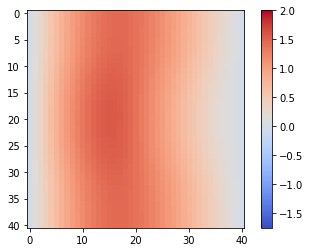

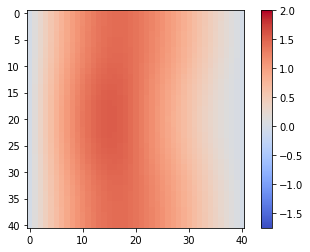

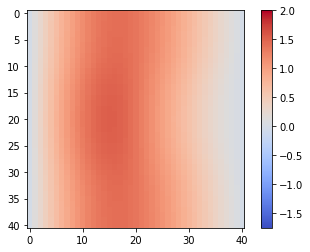

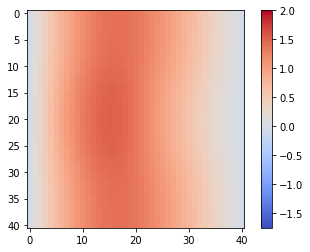

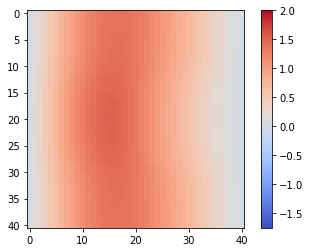

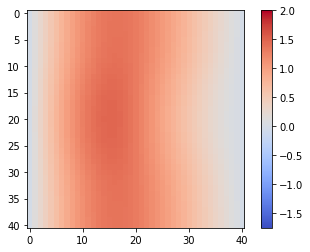

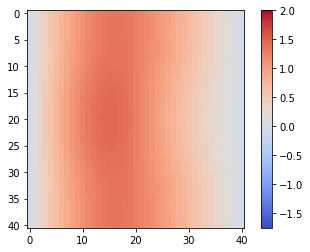

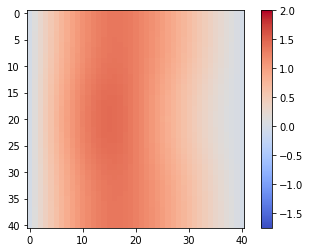

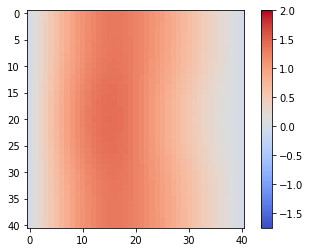

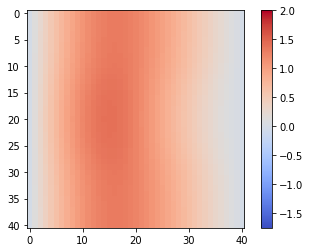

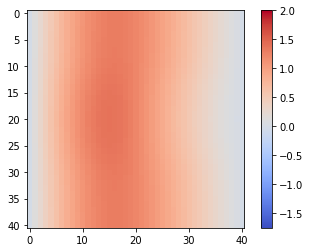

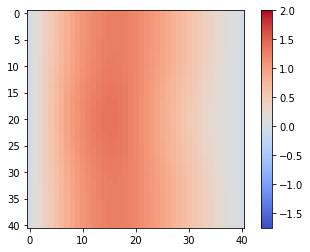

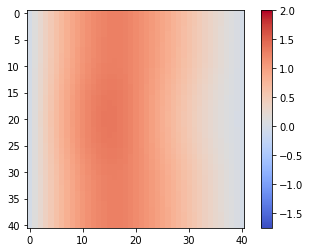

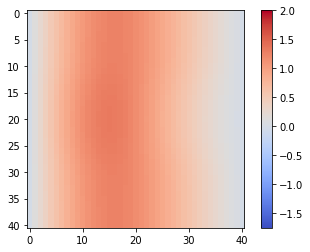

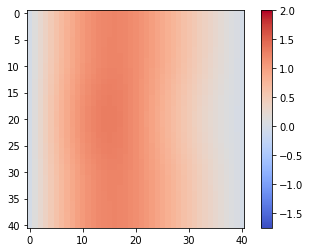

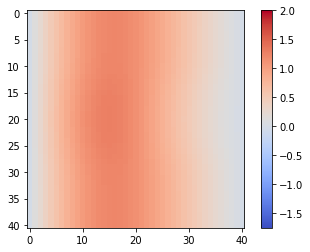

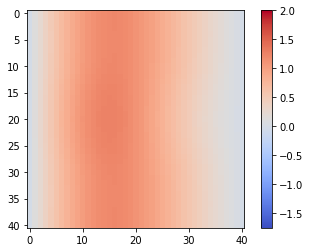

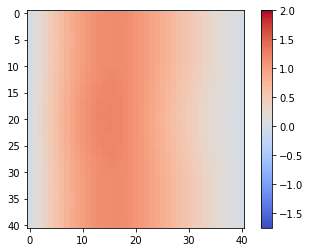

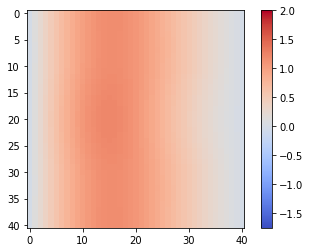

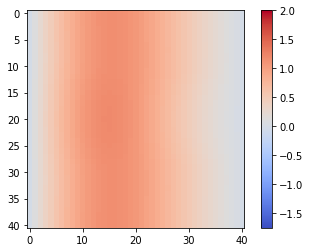

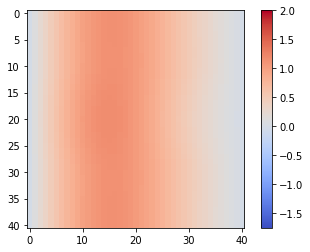

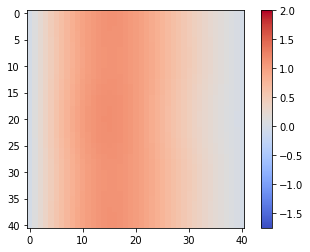

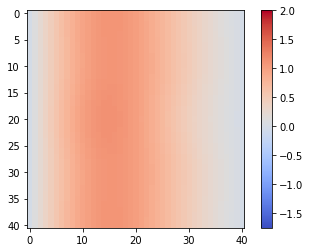

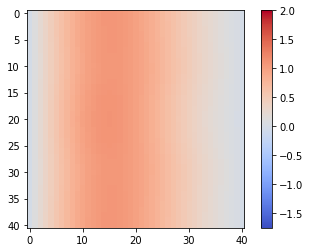

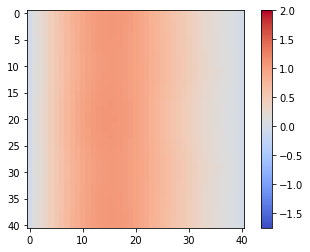

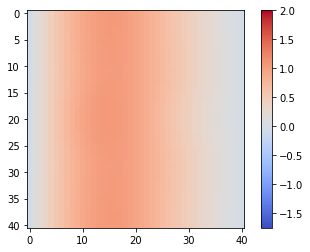

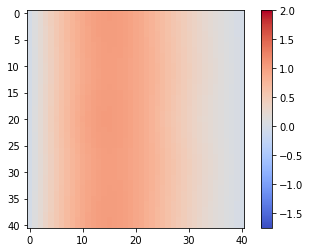

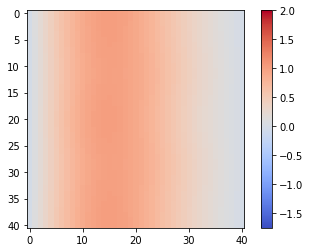

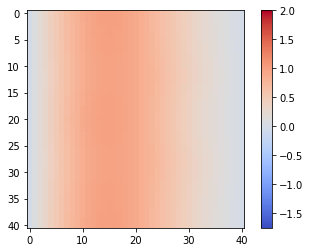

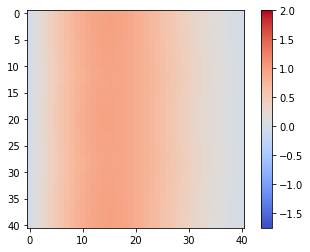

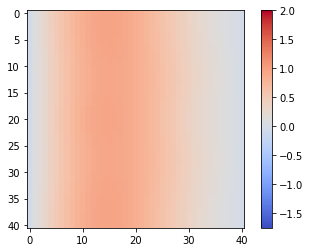

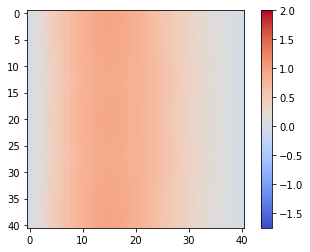

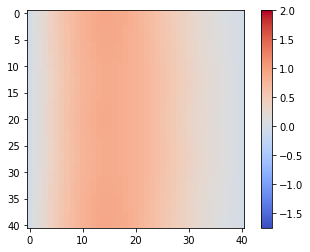

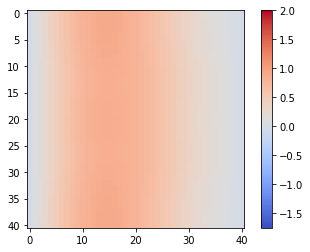

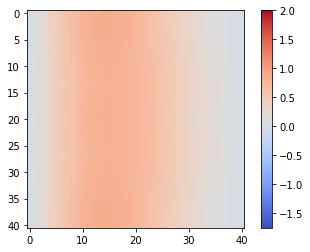

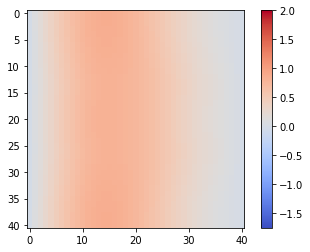

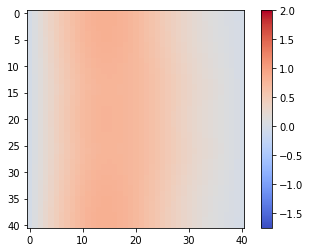

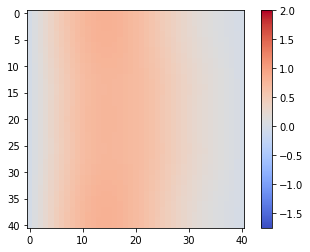

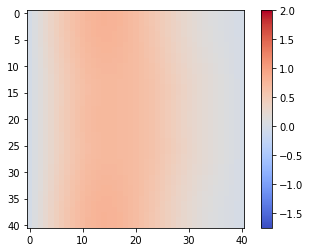

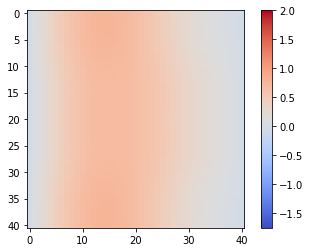

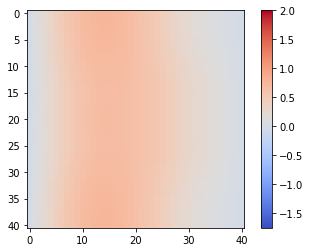

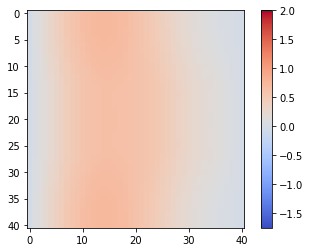

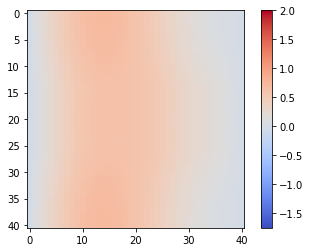

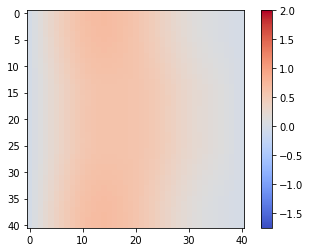

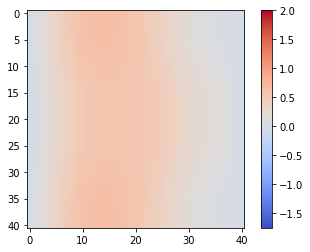

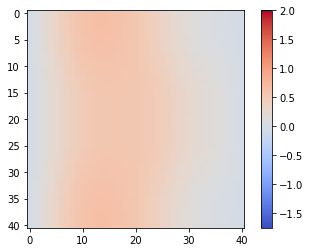

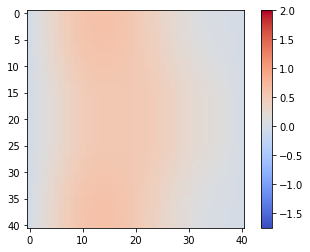

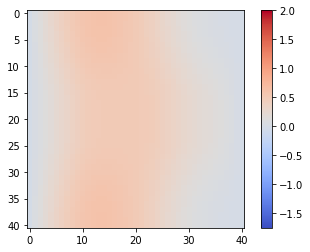

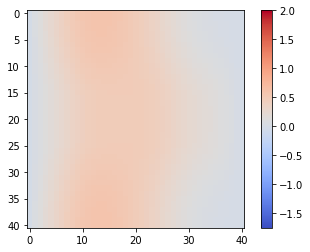

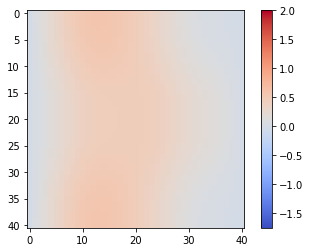

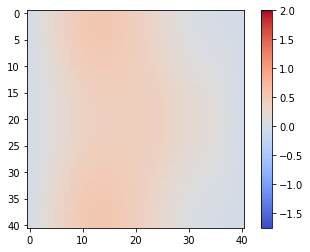

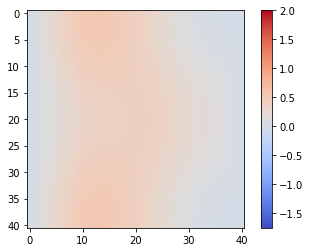

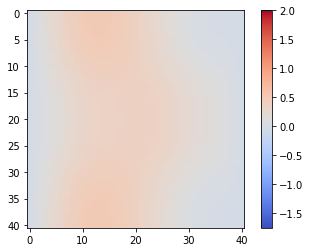

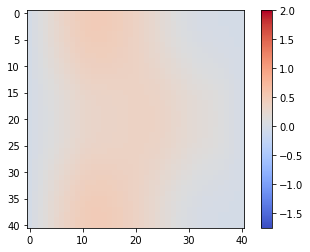

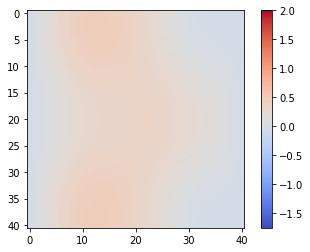

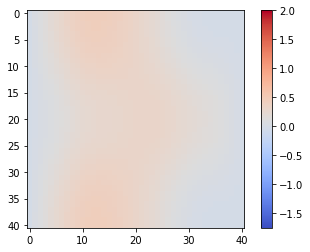

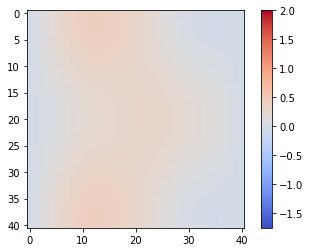

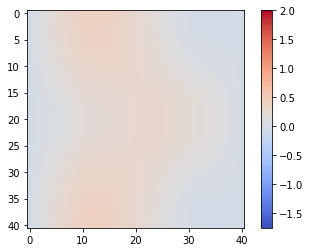

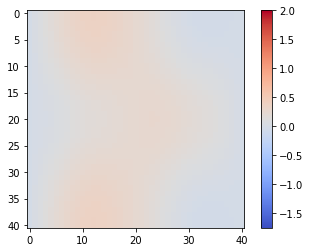

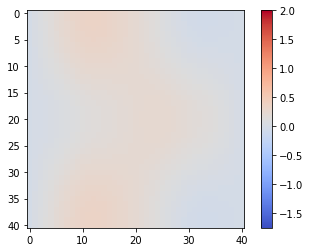

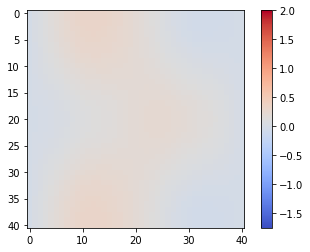

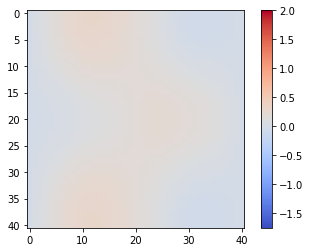

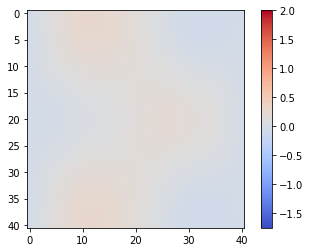

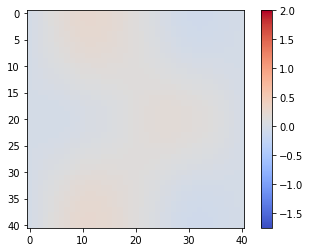

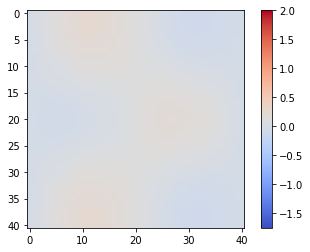

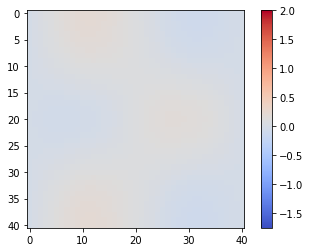

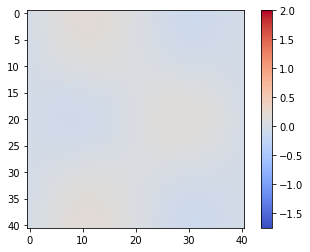

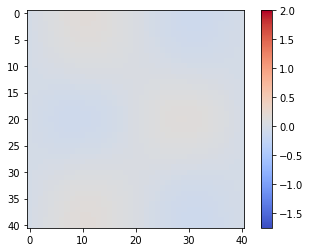

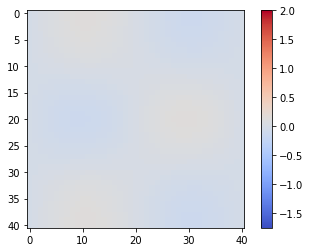

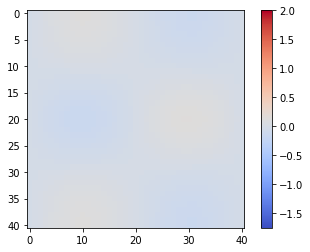

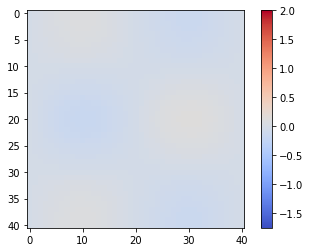

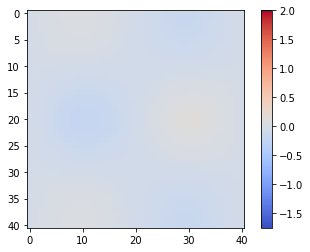

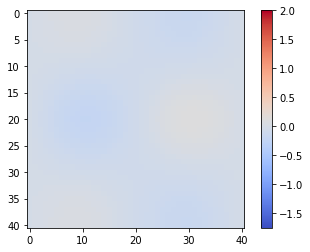

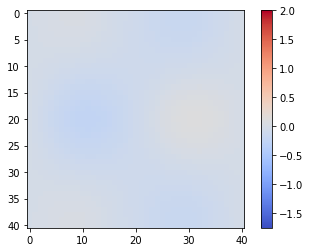

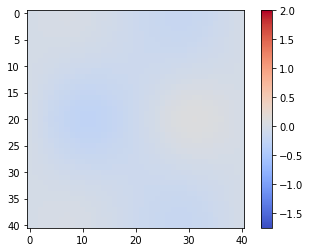

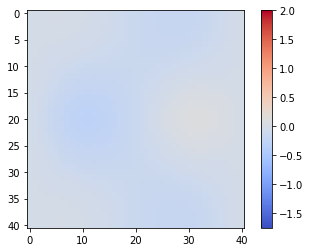

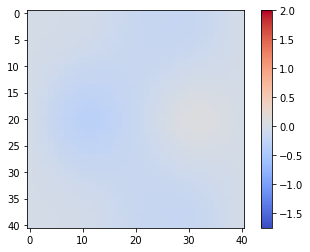

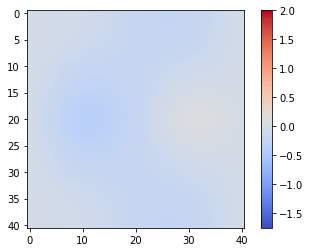

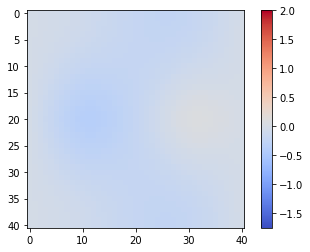

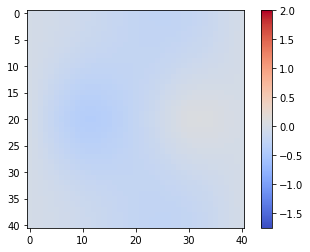

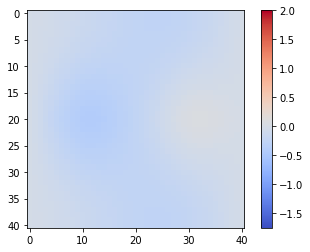

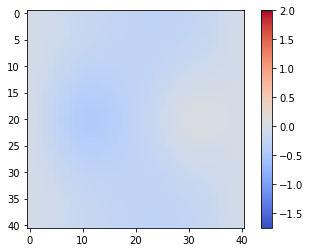

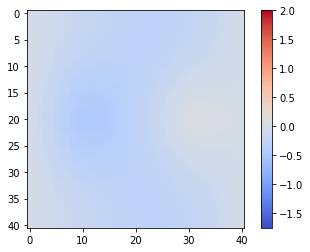

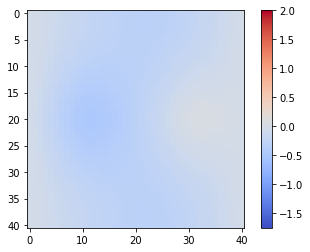

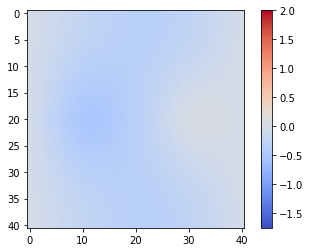

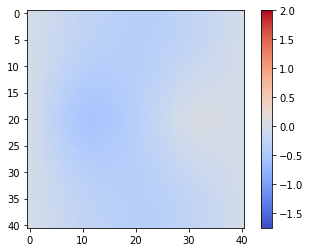

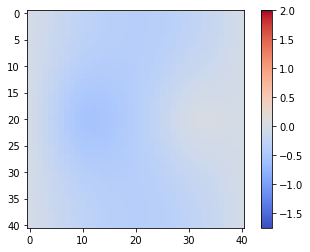

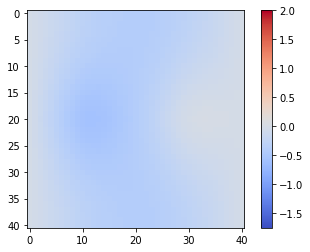

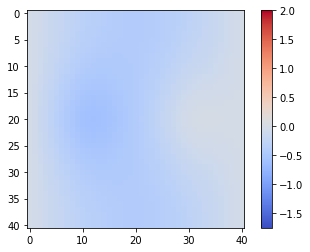

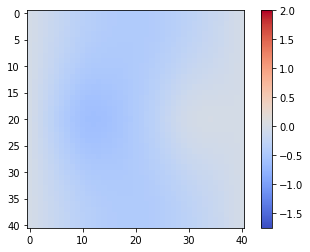

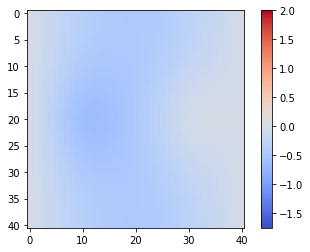

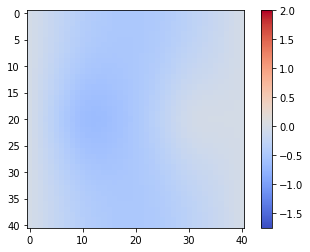

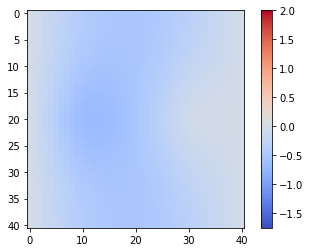

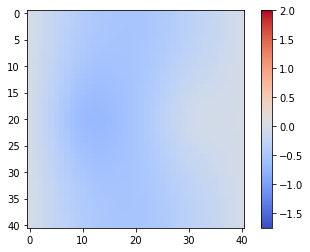

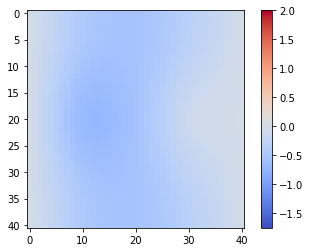

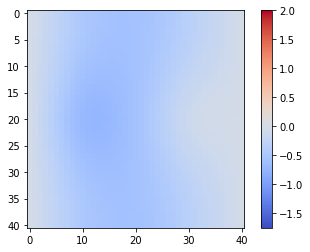

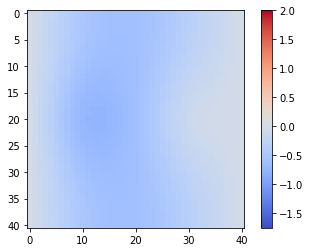

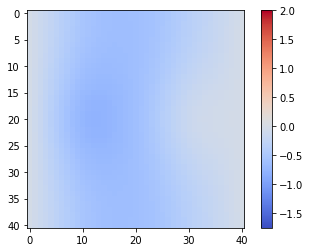

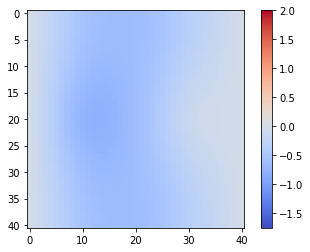

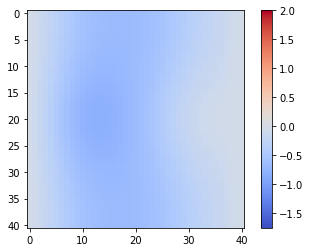

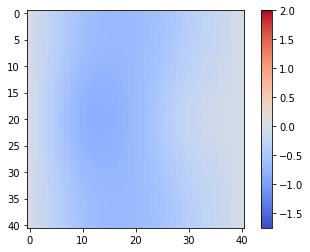

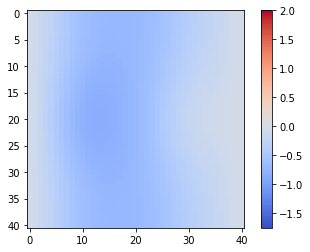

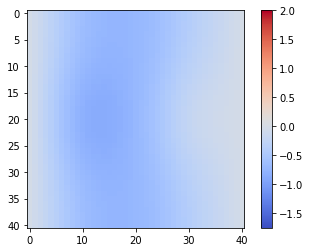

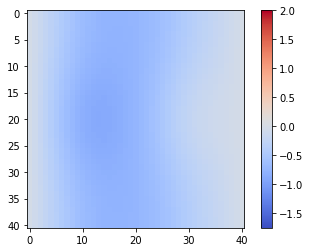

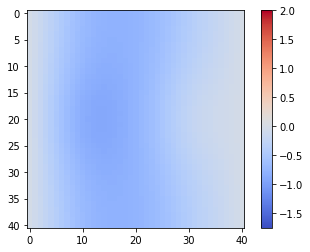

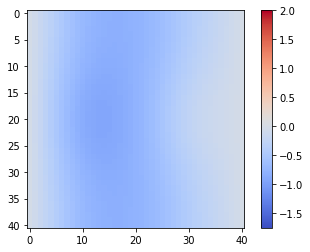

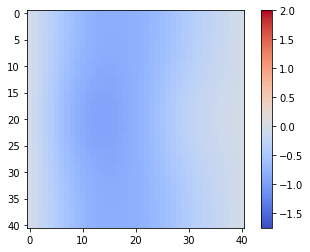

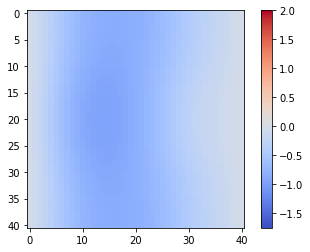

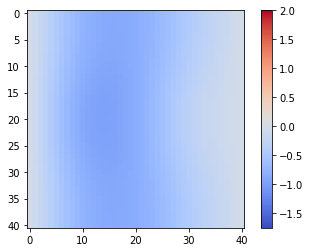

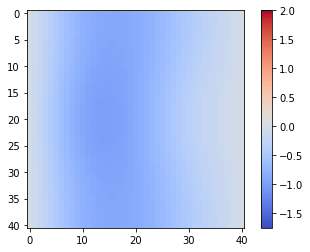

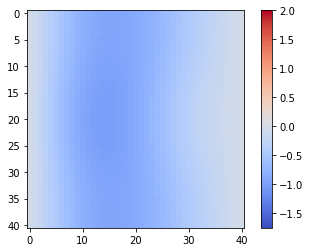

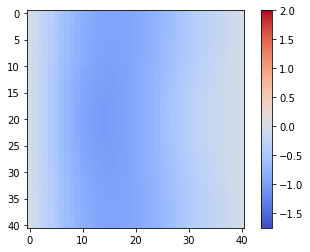

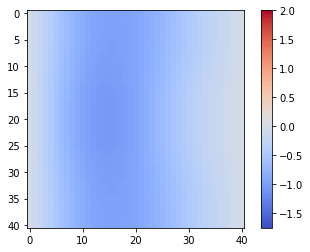

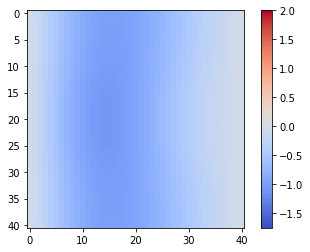

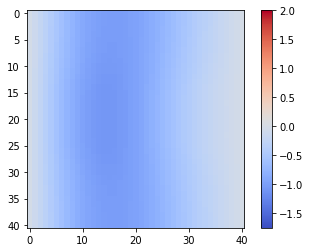

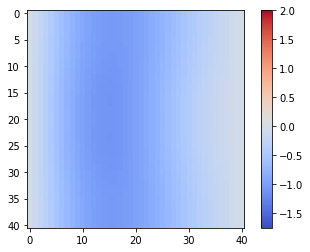

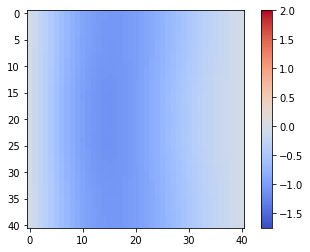

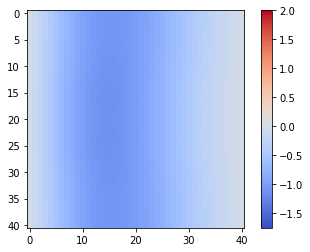

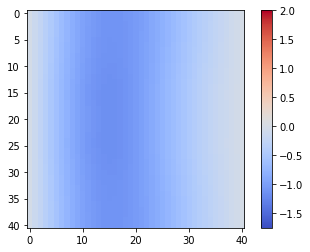

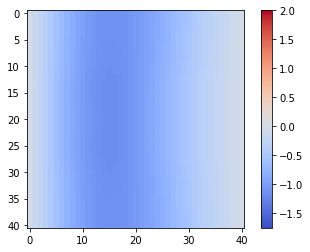

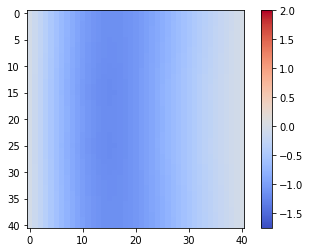

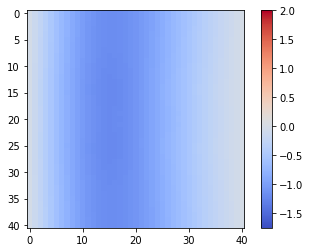

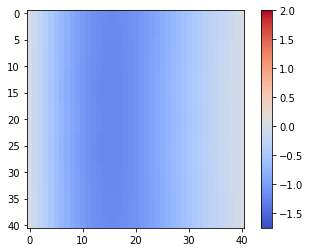

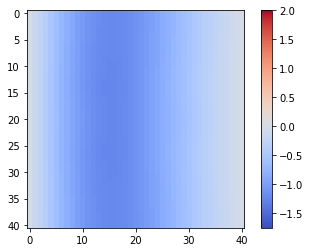

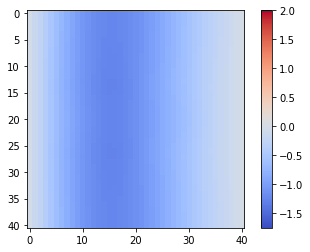

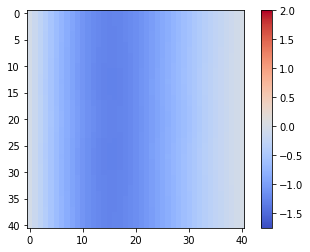

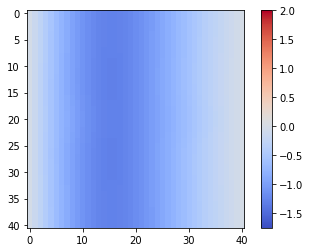

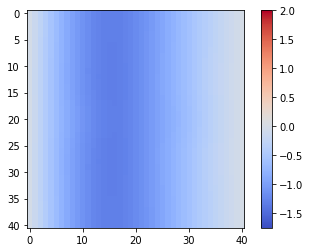

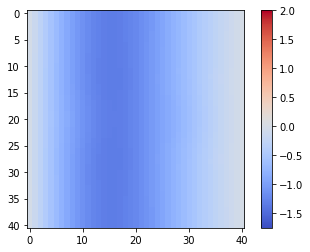

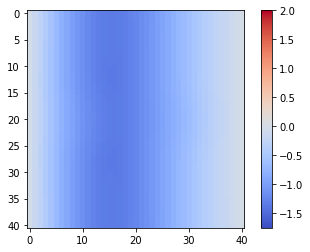

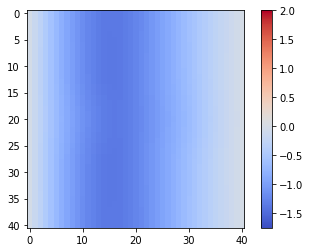

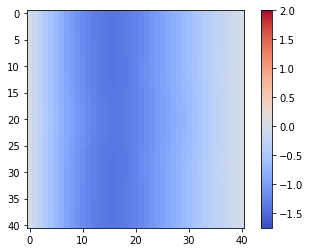

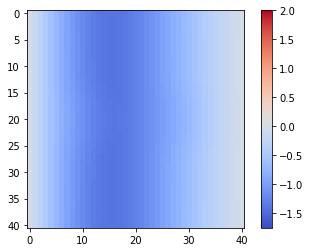

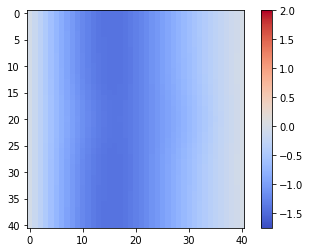

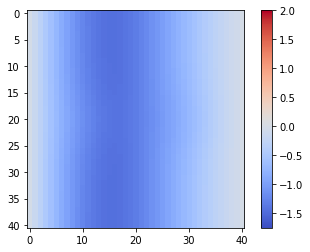

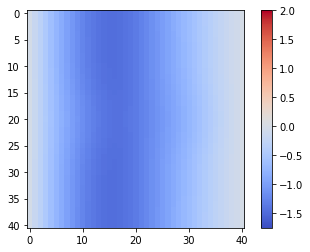

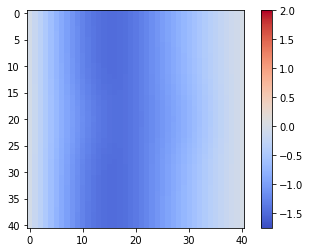

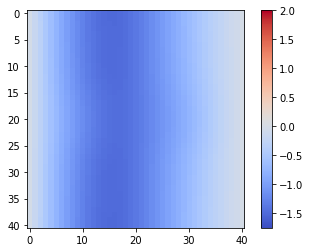

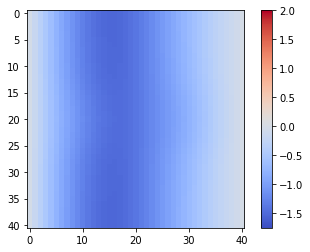

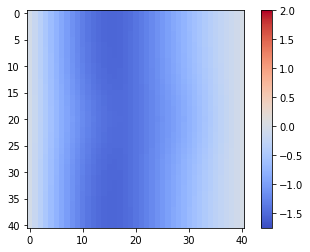

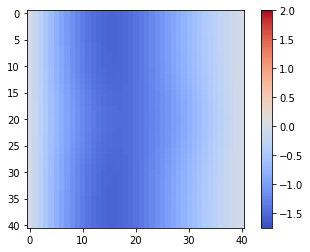

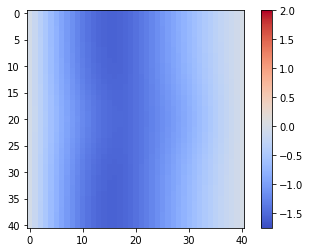

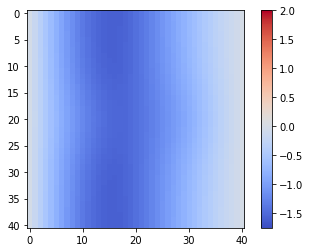

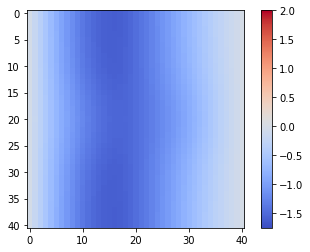

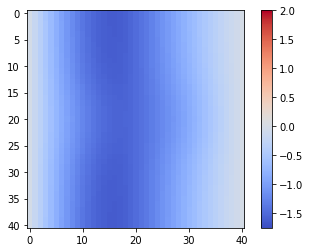

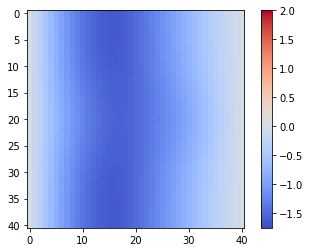

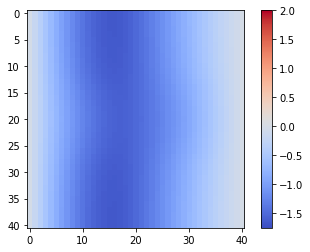

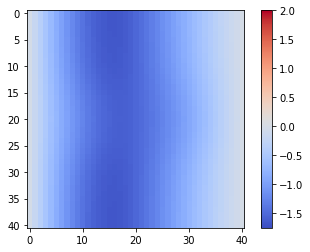

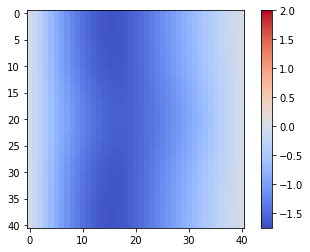

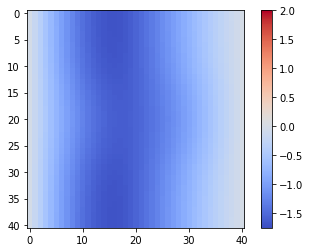

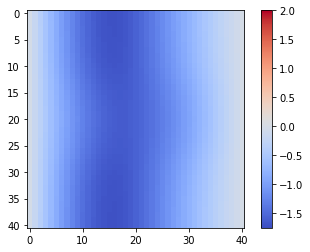

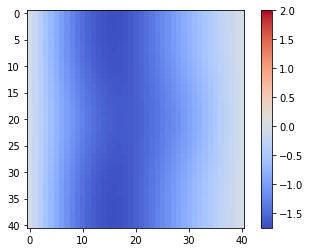

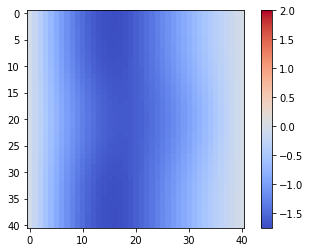

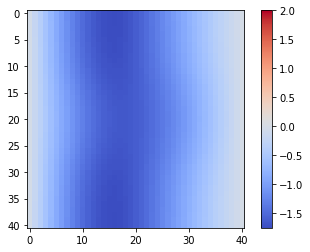

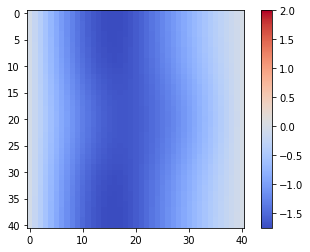

In [11]:
for i in range(Nt):
    fig = plot.imshow(matrix[i], cmap="coolwarm", vmin=matrix.min(), vmax=matrix.max())
    plot.colorbar(fig)
    plot.show()

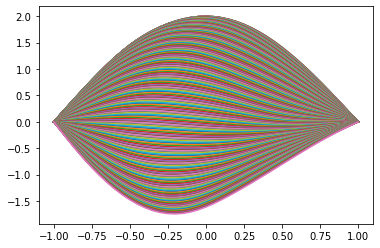

In [12]:
y = np.linspace(-b/2, b/2, Ny)
for i in range(Nt):
    plot.plot(y, matrix[i, 5])